In [23]:
import numpy as np
import pandas as pd

In [24]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# DATA CLEANING

In [25]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


### last 3 columns have very less data so removed

In [31]:
#df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.rename(columns={'v1':'target','v2':'text'}, inplace=True)
df.head(5)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Now the target column has only 2 types of entries, ham or spam...........so we will convert these to numbers using sklearn

In [27]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [56]:
df['target']=encoder.fit_transform(df['target'])
df.head(5)

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail in bugi n great wo...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah do think goe usf live around though


In [ ]:
print(df.isnull().sum())
df.duplicated().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64


np.int64(403)

In [ ]:
df=df.drop_duplicates(keep='first')
df.shape

(5169, 2)

# EDA

In [ ]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

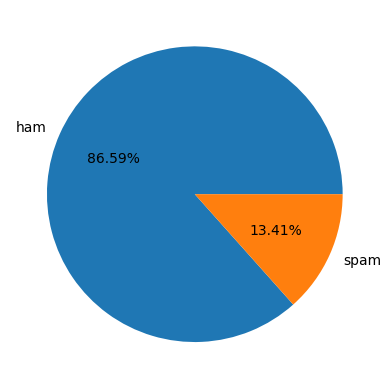

In [46]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%1.2f%%')
plt.show()

In [36]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Shuvradeep\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [37]:
df['num_characters']=df['text'].apply(len)
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentences']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

#print thhose rows which are spam
df[df['target']==1].head(5)

,target,text,num_characters,num_words,num_sentences
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4
8,1,WINNER!! As a valued network customer you have...,158,32,5
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",136,31,3


In [ ]:
#ham msgs
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [38]:
#spam msgs
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.021419
std,29.183082,6.867007,1.537580
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

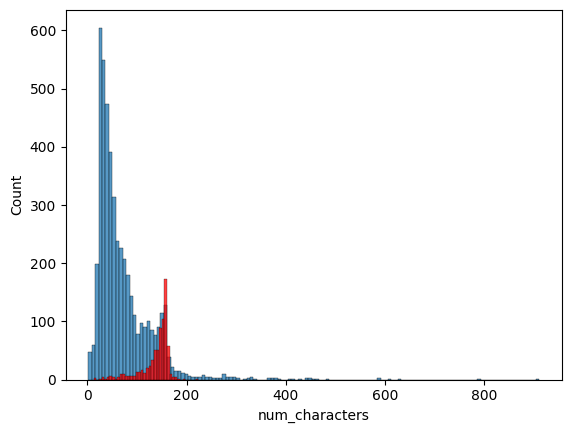

In [39]:
import seaborn as sns
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

so we see that spam msgs have higher character count


##### We need to  find the correlation between our target (spam or no spam) with our variables

<Axes: >

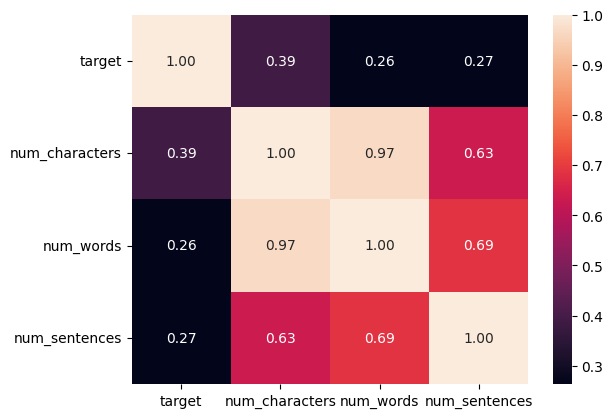

In [40]:
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, fmt='.2f')

So our target depends the most on number of characters rather than words or sentences

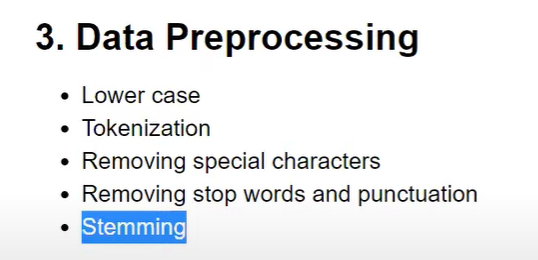

In [41]:
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()

def transform(text):
    text=text.lower()
    text=nltk.word_tokenize(text)   #breaking into tokens
    for i in text:      #removing special characters
        if i.isalnum()==False:
            text.remove(i)

    #removeing stop words and punctuation
    from nltk.corpus import stopwords

    nltk.download('stopwords')
    from string import punctuation
    for i in text:
        if i in stopwords.words('english') or i in punctuation:
            text.remove(i)
    
    #stemming
    y=[]
    for i in text:
        y.append(stemmer.stem(i))
    return " ".join(y)

In [42]:
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
stemmer.stem('giving')

'give'

In [43]:
df['transformed_text']=df['text'].apply(transform)
df.head(5)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shuvradeep\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shuvradeep\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shuvradeep\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shuvradeep\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shuvradeep\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shuvradeep\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail in bugi n great wo...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah do think goe usf live around though


Now we need an idea of how often words appear in the text
SO WE'LL USE WORD CLOUD

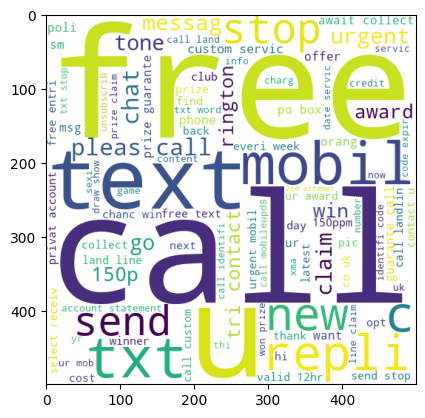

In [47]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,background_color='white',min_font_size=10)
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" ")) 
plt.imshow(spam_wc)

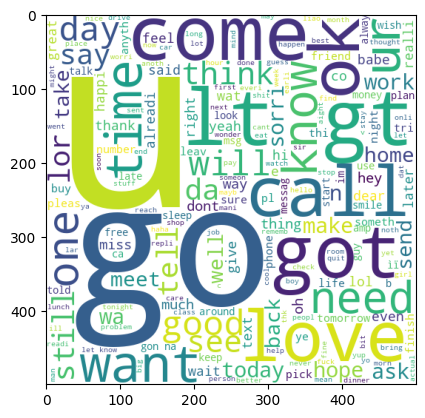

In [ ]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" ")) 
plt.imshow(ham_wc)

NOW we need to pick top frequency words from the spam section

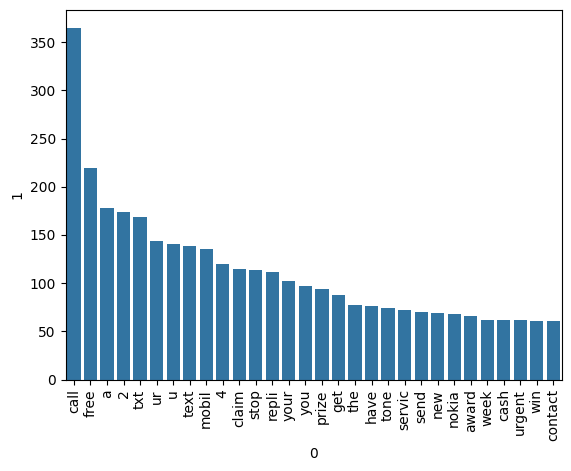

In [48]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

from collections import Counter
common_words=pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(x=common_words[0],y=common_words[1])
plt.xticks(rotation='vertical')
plt.show()

##### NAIVE BIAS CLASSIFIER:-
Naive bias works good for textual data
https://youtu.be/jS1CKhALUBQ?si=ywTlzJbXRC2lBEe-

first create embeddings using bag of words

In [69]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)    
x=tfidf.fit_transform(df['transformed_text']).toarray()
y=df['target'].values




In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [71]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
print(gnb.score(x_test,y_test))
y_pred=gnb.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.873542600896861
[[848 109]
 [ 32 126]]
0.873542600896861
0.5361702127659574


In spam classifier, precision score most important...........here very low so bad model

In [72]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
print(mnb.score(x_test,y_test))
y_pred=mnb.predict(x_test)
#from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9668161434977578
[[956   1]
 [ 36 122]]
0.9668161434977578
0.991869918699187


In [73]:
bnb=BernoulliNB()
bnb.fit(x_train,y_train)
print(bnb.score(x_test,y_test))
y_pred=bnb.predict(x_test)
#from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9775784753363229
[[957   0]
 [ 25 133]]
0.9775784753363229
1.0


Choose tfidf with mnb
you can also train other mll models but still mnb will be the best

In [74]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))